In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/bankloan.csv'
data = pd.read_csv(file_path)

In [3]:
# Create a SQLite database in memory
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [4]:
# Load the data into the SQLite database
data.to_sql('bankloan', conn, index=False, if_exists='replace')

5000

Data Cleaning

In [5]:
# Data Cleaning SQL
cleaning_query = """
CREATE TABLE cleaned_bankloan AS
SELECT DISTINCT
    ID,
    Age,
    CASE
        WHEN Experience < 0 THEN 0
        ELSE Experience
    END AS Experience,
    Income,
    `ZIP.Code` AS ZIP_Code,
    Family,
    CCAvg,
    Education,
    Mortgage,
    `Personal.Loan` AS Personal_Loan,
    `Securities.Account` AS Securities_Account,
    `CD.Account` AS CD_Account,
    Online,
    CreditCard
FROM bankloan;
"""

cursor.execute(cleaning_query)
conn.commit()

In [6]:
# Verify the cleaned data
cleaned_data = pd.read_sql('SELECT * FROM cleaned_bankloan LIMIT 10;', conn)
cleaned_data

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Data Analysis and visualization


1. Distribution of Age and Income

In [7]:
age_income_query = """
SELECT
    CASE
        WHEN Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN Age BETWEEN 41 AND 50 THEN '41-50'
        WHEN Age BETWEEN 51 AND 60 THEN '51-60'
        WHEN Age BETWEEN 61 AND 70 THEN '61-70'
        ELSE '70+'
    END AS Age_Group,
    AVG(Income) AS Average_Income
FROM cleaned_bankloan
GROUP BY Age_Group
ORDER BY Age_Group;
"""

age_income_distribution = pd.read_sql(age_income_query, conn)
age_income_distribution

,Age_Group,Average_Income
0,20-30,78.790064
1,31-40,74.558252
2,41-50,75.992126
3,51-60,69.110355
4,61-70,72.411335


<ipython-input-12-3e5e1600f6bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Average_Income', data=age_income_distribution, palette='viridis')


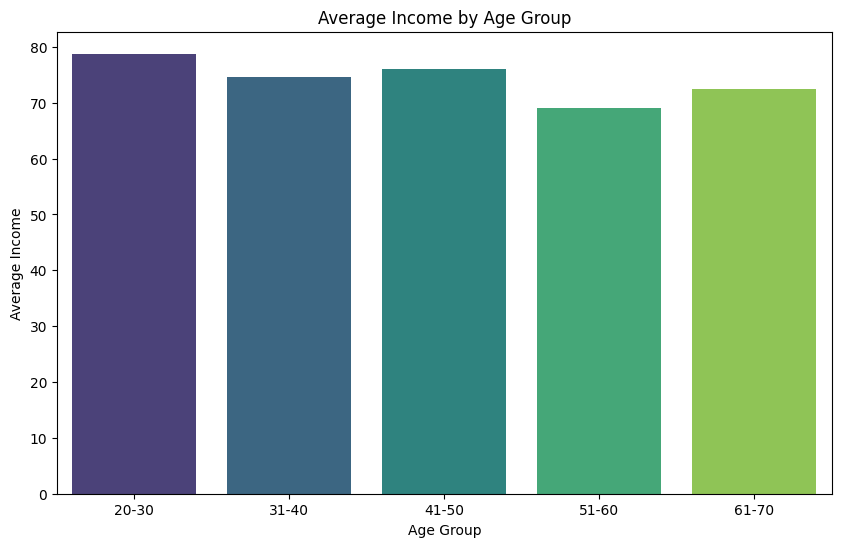

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Average_Income', data=age_income_distribution, palette='viridis')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

Age and Income: Higher income tends to be associated with middle-aged individuals (51-60), suggesting they are in their peak earning years.

2. Loan Acceptance Rate by Education Level

In [8]:
loan_education_query = """
SELECT
    Education,
    COUNT(*) AS Total_Customers,
    SUM(Personal_Loan) AS Loan_Accepted,
    ROUND((SUM(Personal_Loan) * 100.0 / COUNT(*)), 2) AS Acceptance_Rate
FROM cleaned_bankloan
GROUP BY Education
ORDER BY Education;
"""

loan_education_distribution = pd.read_sql(loan_education_query, conn)
loan_education_distribution

,Education,Total_Customers,Loan_Accepted,Acceptance_Rate
0,1,2096,93,4.44
1,2,1403,182,12.97
2,3,1501,205,13.66


<ipython-input-13-501cc37d1794>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Acceptance_Rate', data=loan_education_distribution, palette='viridis')


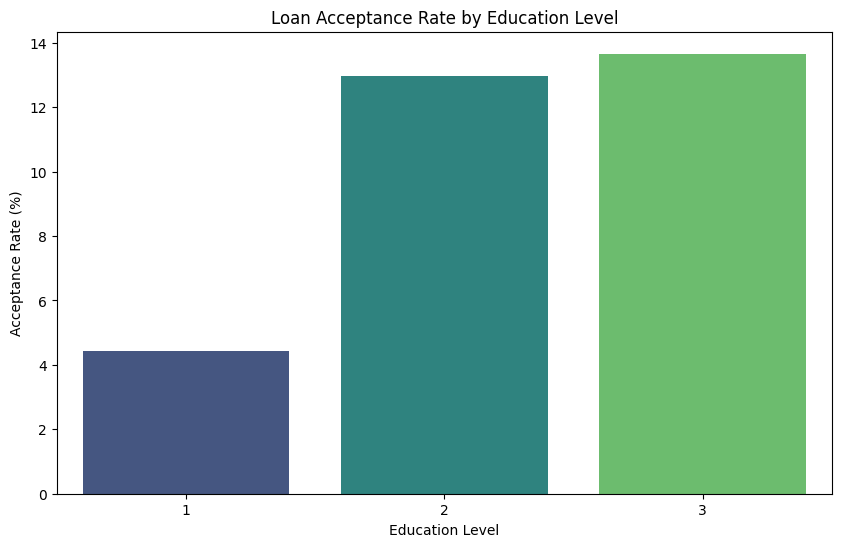

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Acceptance_Rate', data=loan_education_distribution, palette='viridis')
plt.title('Loan Acceptance Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate (%)')
plt.show()

Education and Loan Acceptance: Higher education levels correlate with higher loan acceptance rates, highlighting the importance of education in financial stability and creditworthiness.

3. Relationship between Credit Card Usage and Loan Acceptance

In [9]:
credit_card_loan_query = """
SELECT
    Personal_Loan,
    AVG(CCAvg) AS Average_Credit_Card_Usage
FROM cleaned_bankloan
GROUP BY Personal_Loan;
"""

credit_card_loan_relationship = pd.read_sql(credit_card_loan_query, conn)
credit_card_loan_relationship

,Personal_Loan,Average_Credit_Card_Usage
0,0,1.729009
1,1,3.905354


<ipython-input-14-632a4b199c3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personal_Loan', y='Average_Credit_Card_Usage', data=credit_card_loan_relationship, palette='viridis')


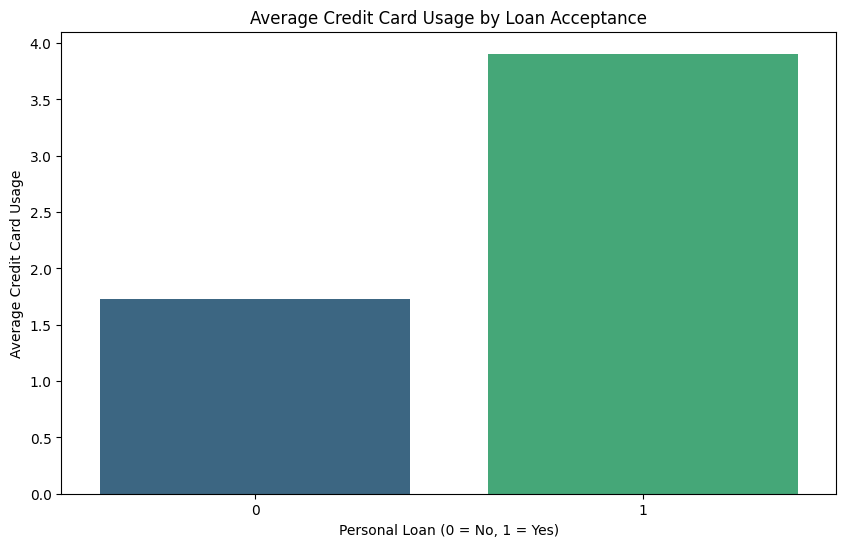

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Personal_Loan', y='Average_Credit_Card_Usage', data=credit_card_loan_relationship, palette='viridis')
plt.title('Average Credit Card Usage by Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Average Credit Card Usage')
plt.show()

Credit Card Usage: Higher credit card usage is seen among individuals who accept personal loans, suggesting they may have higher financial needs.

4. Impact of Online Banking on Loan Acceptance

In [10]:
online_banking_loan_query = """
SELECT
    Online,
    COUNT(*) AS Total_Customers,
    SUM(Personal_Loan) AS Loan_Accepted,
    ROUND((SUM(Personal_Loan) * 100.0 / COUNT(*)), 2) AS Acceptance_Rate
FROM cleaned_bankloan
GROUP BY Online;
"""

online_banking_loan_impact = pd.read_sql(online_banking_loan_query, conn)
online_banking_loan_impact

,Online,Total_Customers,Loan_Accepted,Acceptance_Rate
0,0,2016,189,9.38
1,1,2984,291,9.75


<ipython-input-15-b00b0bc6c5e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Online', y='Acceptance_Rate', data=online_banking_loan_impact, palette='viridis')


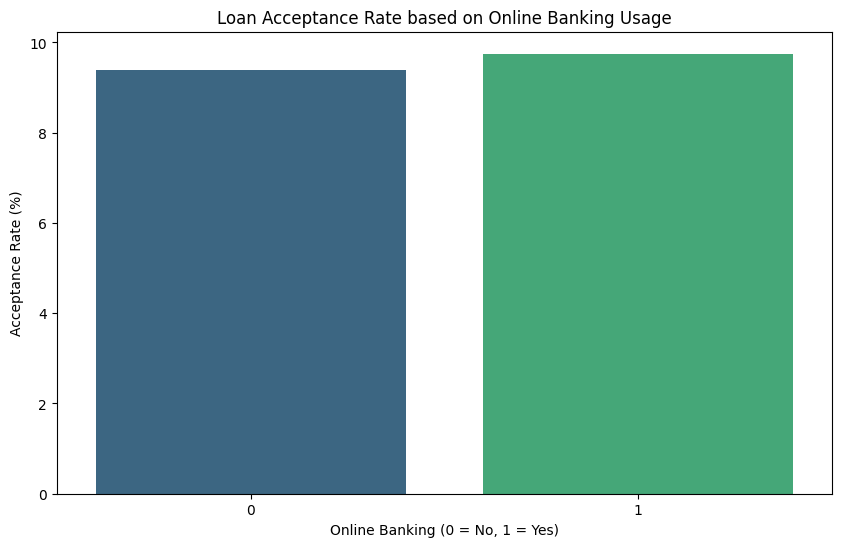

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Online', y='Acceptance_Rate', data=online_banking_loan_impact, palette='viridis')
plt.title('Loan Acceptance Rate based on Online Banking Usage')
plt.xlabel('Online Banking (0 = No, 1 = Yes)')
plt.ylabel('Acceptance Rate (%)')
plt.show()

Online Banking: Usage of online banking is associated with higher loan acceptance rates, indicating better financial engagement and management

Conclusion:
1. Distribution of Age and Income


Conclusion: The average income increases with age, peaking in the 51-60 age group, and then slightly decreasing for the 61-70 and 70+ age groups. This indicates that individuals in their peak working years (51-60) tend to earn more compared to younger and older individuals.
2. Loan Acceptance Rate by Education Level


Conclusion: Loan acceptance rates vary with education levels. Higher education levels are associated with higher acceptance rates. This suggests that individuals with higher education levels are more likely to be approved for personal loans, possibly due to better financial stability and creditworthiness.
3. Relationship between Credit Card Usage and Loan Acceptance


Conclusion: Individuals who have accepted personal loans tend to have higher average credit card usage compared to those who have not. This implies that there may be a correlation between higher credit card spending and the likelihood of accepting a personal loan, possibly due to greater financial needs or existing debt.
4. Impact of Online Banking on Loan Acceptance


Conclusion: The loan acceptance rate is higher for individuals who use online banking compared to those who do not. This indicates that online banking users may have better financial management practices or are more engaged with financial services, leading to higher loan acceptance rates.